# eMoney

In this notebook, we will clean and analyze a summarized dataset of eMoney’s customer base and operations to extract insights that can help guide the company through its current challenges. Through this analysis, we aim to support eMoney in achieving its goals of financial sustainability and operational efficiency during this critical phase of its development.

To achieve this, we will follow four steps:

- Loading
- Data Understanding
- Data Cleaning
- Data Analysis

By: Andrea López

## 1. Loading

### 1.1. Loading Libraries

In [ ]:
# Import necessary libraries

### 1.2. Loading Data

In [ ]:
# Add directory and file path

## 2. Data Understanding

### 2.1. Dataset Size

The DataFrame consists of:

- 33 columns
- 2.997.300 rows
- 3 types of columns:
    - Numerical:
        - Integer (15)
        - Float (8)
    - Categorical:
        - Object (10)

**Comments**:

There are several columns with wrong data types. We will convert them as follows:
- Converting the following columns to "object" because they are identifiers:
    - customer_id
    - region_code
    - sale_id
    - product_id

- Converting the following columns to boolean because they have only 2 unique values (0 vs 1):
    - active_in_app
    - short_term_deposit
    - loans
    - mortgage
    - funds
    - securities
    - long_term_deposit
    - em_account_pp
    - credit_card
    - payroll
    - pension_plan
    - payroll_account
    - emc_account
    - debit_card
    - em_account_p
    - em_account
    - gender
    - deceased

- Converting the following columns to datetime:
    - entry_date
    - month_sale

### 2.2. Dataset Visualization

We can see multiple columns that contain missing values, which will require cleaning and handling of data.

### 2.3. Descriptive Statistics

### 2.4. Duplicated rows

There are no duplicated rows.

### 2.5. Variance

There is one column with zero variance that we will remove as it does not contain relevant information.

### 2.6. Missing Data

There are 13 columns that contain missing values.

## 3. Data Cleaning

In [12]:
df = df.drop(["em_account_pp", "gender"], axis=1)

### 3.1. Missing Values

In [ ]:
# Defining function to analize multiple columns at the same time:
def analyze_columns(df, columns_names):
    """
    Analyzes multiple columns in a DataFrame to check for missing values, percentage of missing values,
    number of unique values, and frequency of each unique value.

    Parameters:
    - df: The DataFrame to analyze
    - columns_names: A list of columns names to analyze

    Outputs:
    - Prints information about missing values, unique values, and the frequency of each unique value for each column.
    """

    for column_name in columns_names:
        print(f"\nAnalyzing column: '{column_name}'")

        # Check if variable exists in DataFrame:
        if column_name not in df.columns:
            print(f"Column '{column_name}' does not exist in the DataFrame.")
            continue

        # Total number of missing values:
        missing_count = df[column_name].isnull().sum()
        print(f"There are {missing_count} missing values in the '{column_name}' column.")

        # Percentage of missing values:
        missing_percentage = (missing_count / df.shape[0]) * 100
        print(f"The percentage of missing values is {missing_percentage:.2f}%.")

        # Number of unique values:
        unique_count = df[column_name].nunique()
        print(f"There are {unique_count} unique categories in the '{column_name}' column.")

        # Frequency of unique values:
        unique_values = df[column_name].value_counts(ascending=False)
        # Setting the display option to show only the top 10 unique values:
        top_10_unique_values = unique_values.head(10)
        # Printing the top 10 unique values and their frequencies:
        print(f"These are the top 10 unique values and their frequencies in the '{column_name}' column:")
        print(top_10_unique_values)

In [16]:
columns_to_analyze = ["entry_channel", "segment", "region_code", "salary", "sale_id",
                      "month_sale", "product_id", "net_margin", "product_desc", "family_product"]

analyze_columns(df, columns_to_analyze)


Analyzing column: 'entry_channel'
There are 67717 missing values in the 'entry_channel' column.
The percentage of missing values is 2.26%.
There are 55 unique categories in the 'entry_channel' column.
These are the top 10 unique values and their frequencies in the 'entry_channel' column:
entry_channel
KHE    1556382
KFC     449144
KHQ     295834
KAT     208929
KHK     118142
KHM      91053
KHN      55215
KFA      39651
KHD      37793
RED      31674
Name: count, dtype: int64
--------------------------------------------------

Analyzing column: 'segment'
There are 68231 missing values in the 'segment' column.
The percentage of missing values is 2.28%.
There are 3 unique categories in the 'segment' column.
These are the top 10 unique values and their frequencies in the 'segment' column:
segment
03 - UNIVERSITY     1953432
02 - INDIVIDUALS     926214
01 - TOP              49423
Name: count, dtype: int64
--------------------------------------------------

Analyzing column: 'region_code'
Th

We analyze each column and choose the best way to handle its missing values.

Below we can find two examples of how we handle missing values.

#### - Retrieving values

Below we can find an example of how we retrieve values in multiple columns.

In [17]:
# "product_id"

# Analyzing if we can get information about other columns in the dataset.
# If so, charge them with the corresponding information.
# If this were not the case, we can impute them with a valid and notable value to recognize that it was/is a missing value.

# 1. Creating a dictionary for direct mapping of "product_desc" to "product_id":
product_mapping = {
    'short_term_deposit': 2335.0,
    'loans': 9001.0,
    'mortgage': 4033.0,
    'funds': 1119.0,
    'securities': 2673.0,
    'long_term_deposit': 2336.0,
    'credit_card': 2312.0,
    'payroll': 2234.0,
    'pension_plan': 1364.0,
    'payroll_account': 2235.0,
    'emc_account': 8871.0,
    'debit_card': 3819.0,
    'em_account_p': 0.0,
    'em_account': 4657.0
}

# 2. Imputing "product_id" based on "product_desc" by mapping the dictionary:
df["product_id"] = df["product_id"].fillna(df["product_desc"].map(product_mapping))

# 3. Imputing remaining missing values with a notable value ("9999.0"):
df["product_id"] = df["product_id"].fillna(9999.0)

# Verifying output:
print(df["product_id"].isnull().sum())

/var/folders/96/14wksxf10f77q03cvpjqp03m0000gn/T/ipykernel_3043/3880250405.py:26: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["product_id"] = df["product_id"].fillna(df["product_desc"].map(product_mapping))


0


#### - Specific values

In [ ]:
### Imputation with highlighted values ​​for specific codes:
df["region_code"] = df["region_code"].fillna(999).infer_objects().astype(int)
df["sale_id"] = df["sale_id"].fillna("unknown")

# Verifying output:
print(df["region_code"].isnull().sum())
print(df["sale_id"].isnull().sum())

/var/folders/96/14wksxf10f77q03cvpjqp03m0000gn/T/ipykernel_3043/2570428436.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["region_code"] = df["region_code"].fillna(999).infer_objects().astype(int)


0
0


### 3.2. Outliers

We will use the describe() method in order to show the statistics of the key numeric columns, excluding unnecessary columns.

In [30]:
df[["age", "salary", "net_margin"]].describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
age,2997300.0,29.78,11.97,2.00,22.00,25.00,34.00,105.00
salary,2997300.0,109616.77,188593.93,3731.79,65642.37,88063.05,123555.12,28894395.51
net_margin,2997300.0,105.18,468.22,25.00,65.50,67.80,69.50,17615.60


Below we will see an example of how we handle outliers.

Let's examine the "age" column.

- The minimum age is 2. It's possible and unusually low for a bank customer. So, it could be an outlier.
- The average age is approximately 30.
- And the maximum age is 105. It's technically possible, although it's quite rare. It seems as an outlier.

We handle all columns in the same way.

"age" column seem to contain outliers so it is necessary to address them to avoid distorting our analysis.

To identify outliers, we will be using the Interquartile Rule (IQR Score).
We will also generate boxplots to analyze the distribution of numerical columns.

In [31]:
# Defining function to generate boxplots:
def plot_boxplots(df):
    """
    Creates and displays a boxplot for each numerical column in the DataFrame.

    Parameters:
    - df: pandas DataFrame
    """
    # Identifying numerical columns:
    excluded_columns = ["entry_date", "month_sale"]
    numerical_columns= df.select_dtypes(include=["number"]).columns
    numerical_columns = [col for col in numerical_columns if col not in excluded_columns]

    # Setting up the plotting environment:
    num_plots = len(numerical_columns)
    fig, axes = plt.subplots(nrows=num_plots, ncols=1, figsize=(10, 5 * num_plots))

    if num_plots == 1:
        axes = [axes]

    for ax, col in zip(axes, numerical_columns):
        sns.boxplot(x=df[col], ax=ax, color="green")
        ax.set_title(f'Boxplot of {col}')
        ax.set_xlabel(col)

    plt.tight_layout()
    plt.show()

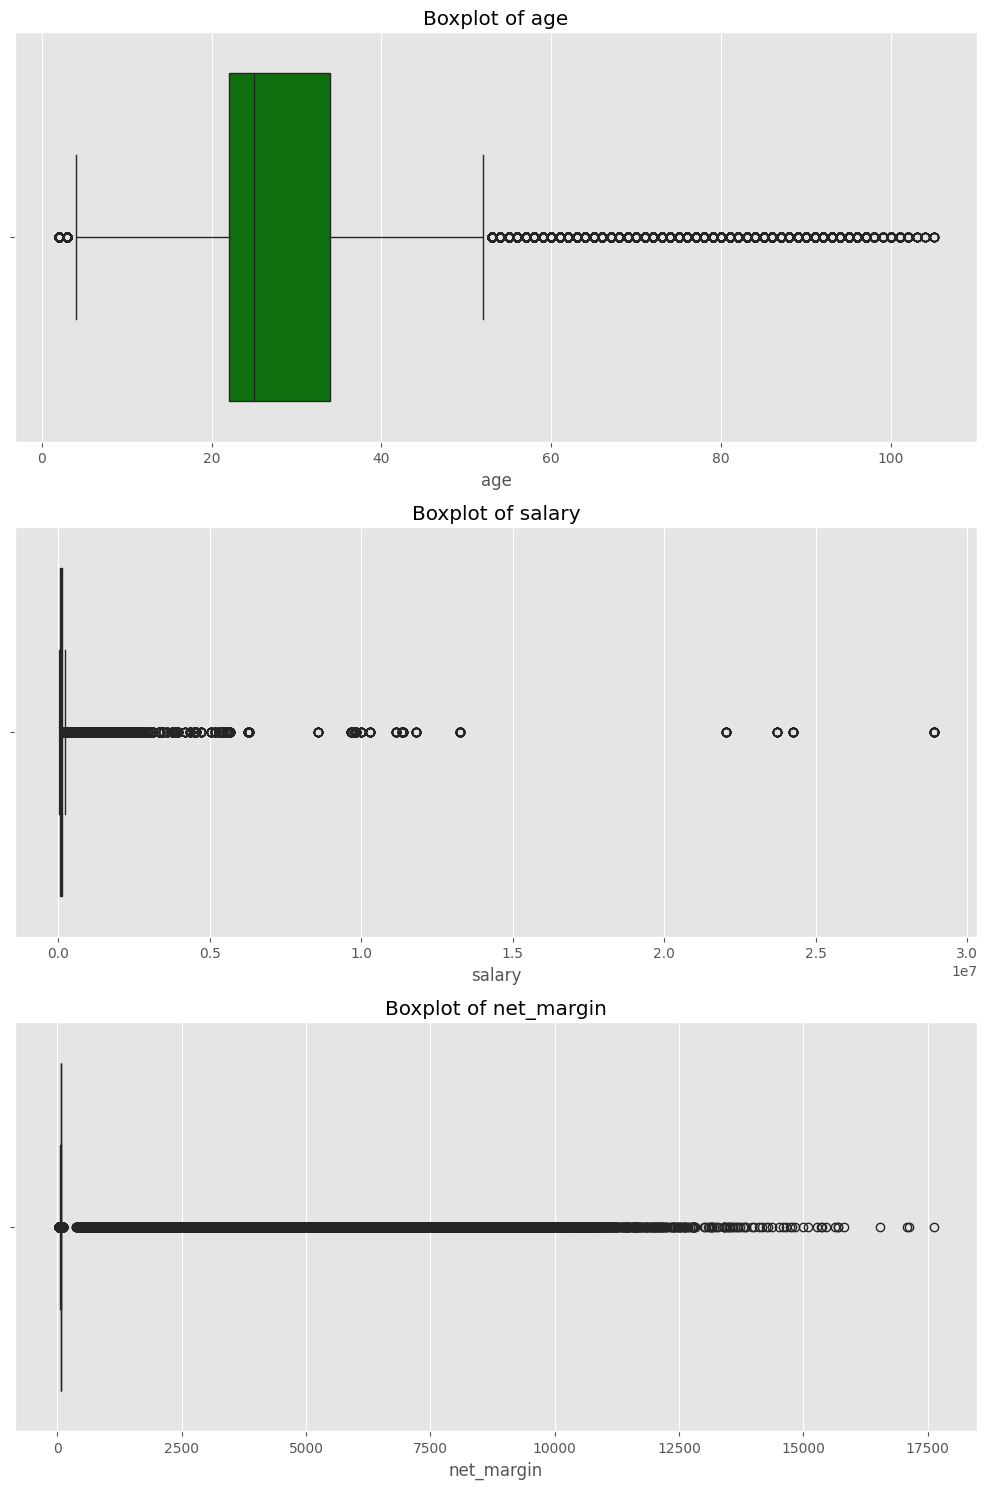

In [32]:
plot_boxplots(df)

In [ ]:
# "age"

# Calculating Q1 and Q3:
Q1 = df["age"].quantile(0.25)
Q3 = df["age"].quantile(0.75)

# Computing IQR and determining outlier boundaries:
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifying outliers:
outliers = df[(df["age"] < lower_bound) | (df["age"] > upper_bound)]

# Printing results.

Q1: 22.0
Q3: 34.0
IQR: 12.0
Lower Bound: 4.0
Upper Bound: 52.0
N.º entries above Upper Bound: 188388
Percentage of dataset: 6.29%


In [ ]:
# Definying a function to replace outliers with lower and upper bounds:
def replacing_outliers_with_minmax(df, column):

    # Calculating Q1, Q3, and the IQR for the variable "age":
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)

    # Calculating the IQR:
    IQR = Q3 - Q1

    # Calculating the lower and upper bounds:
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Replacing values outside the bounds with the corresponding lower or upper bounds:
    df[column] = df[column].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))

    return df

# Applying replacement:
for column in outliers_to_replace:
  df = replacing_outliers_with_minmax(df, column)

# Verifying output.

,count,mean,std,min,25%,50%,75%,max
age,2997300.0,29.065949,9.849195,4.00,22.00,25.00,34.00,52.000
salary,2997300.0,99112.985386,47053.907135,3731.79,65642.37,88063.05,123555.12,210424.245
net_margin,2997300.0,67.591600,3.365276,59.50,65.50,67.80,69.50,75.500


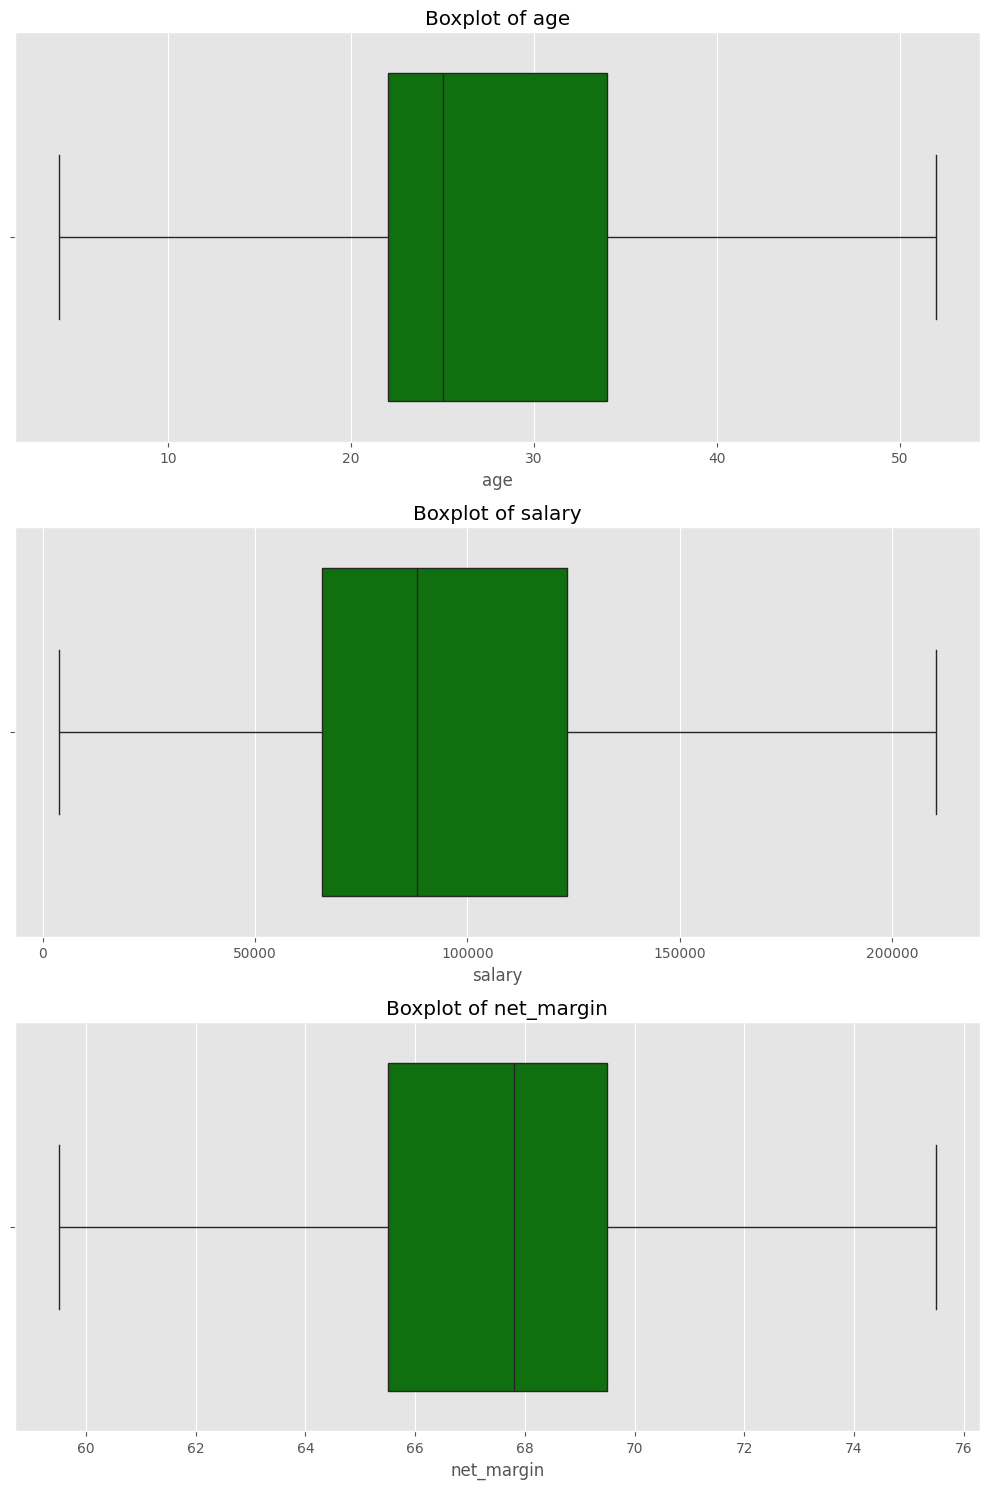

In [ ]:
# Plotting the boxplots after removing outliers.

### 3.3. Correlations

Next, we will investigate potential correlations among columns in the dataset.

We will start by generating a correlation matrix using the corr() method. Then, we will visualize the matrix using the heatmap() function from Seaborn.

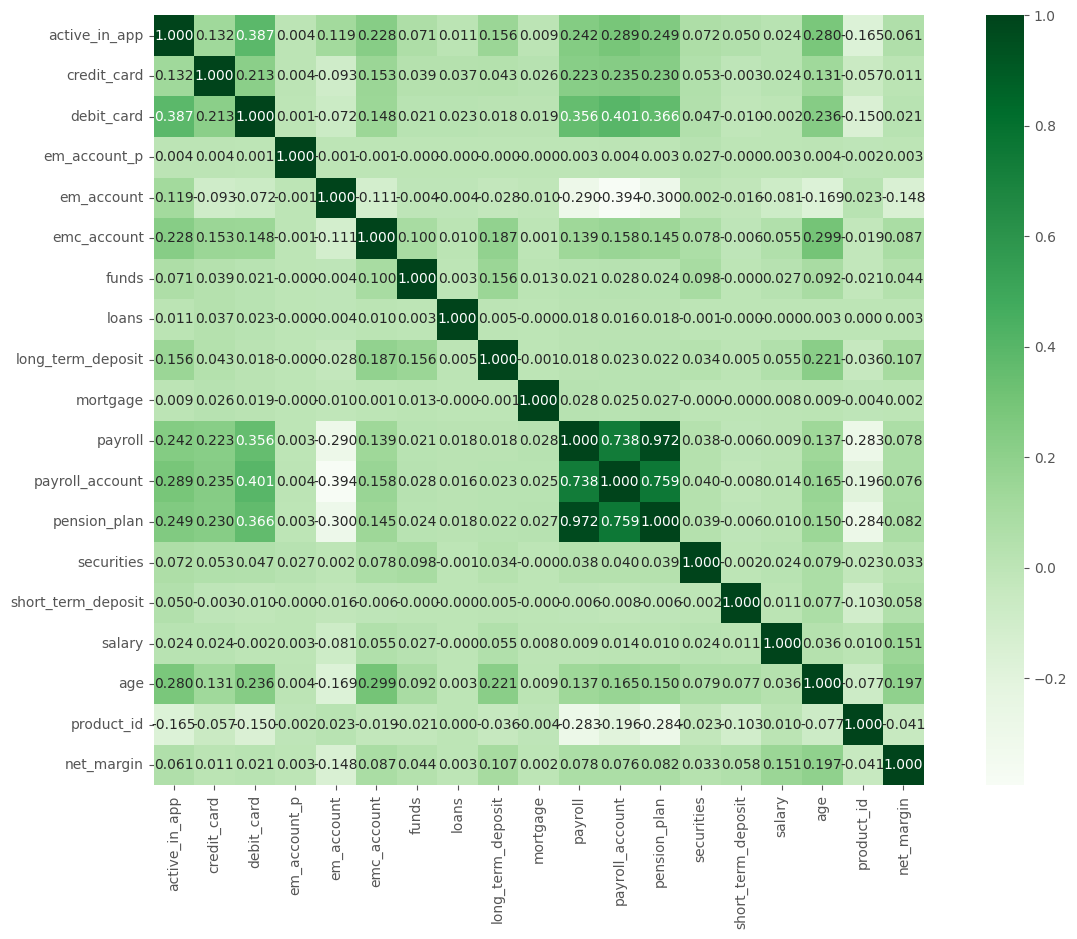

In [39]:
corr_matrix = df[["active_in_app", "credit_card", "debit_card", "em_account_p", "em_account",
                  "emc_account", "funds", "loans", "long_term_deposit", "mortgage",
                  "payroll", "payroll_account", "pension_plan", "securities",
                  "short_term_deposit", "salary", "age", "product_id", "net_margin"]].corr()

plt.figure(figsize=(16, 10))
sns.heatmap(corr_matrix,
            cmap='Greens',
            fmt='.3f',
            square=True,
            linecolor='white',
            annot=True)

plt.show()

### 3.4. Columns creation

Below we can see two examples of how we create columns in the complete project.

#### - region_name

On the one hand, we have seen that "region_code" column contain unique values that do not facilitate the interpretation of the information. We will create a column from "region_code" where the names of the regions associated with each code are reflected.

In [ ]:
# Ensuring "region_code" is an integer:
df["region_code"] = df["region_code"].astype("int")

# Dictionary mapping region codes to names:
regionsnames_dict = {
    1: 'Álava',
    2: 'Albacete',
    3: 'Alicante',
    4: 'Almería',
    5: 'Ávila',
    6: 'Badajoz',
    7: 'Islas Baleares',
    8: 'Barcelona',
    9: 'Burgos',
    10: 'Cáceres',
    11: 'Cádiz',
    12: 'Castellón',
    13: 'Ciudad Real',
    14: 'Córdoba',
    15: 'La Coruña',
    16: 'Cuenca',
    17: 'Gerona',
    18: 'Granada',
    19: 'Guadalajara',
    20: 'Guipúzcoa',
    21: 'Huelva',
    22: 'Huesca',
    23: 'Jaén',
    24: 'León',
    25: 'Lérida',
    26: 'La Rioja',
    27: 'Lugo',
    28: 'Madrid',
    29: 'Málaga',
    30: 'Murcia',
    31: 'Navarra',
    32: 'Ourense',
    33: 'Asturias',
    34: 'Palencia',
    35: 'Las Palmas',
    36: 'Pontevedra',
    37: 'Salamanca',
    38: 'Santa Cruz de Tenerife',
    39: 'Cantabria',
    40: 'Segovia',
    41: 'Sevilla',
    42: 'Soria',
    43: 'Tarragona',
    44: 'Teruel',
    45: 'Toledo',
    46: 'Valencia',
    47: 'Valladolid',
    48: 'Vizcaya',
    49: 'Zamora',
    50: 'Zaragoza',
    51: 'Ceuta',
    52: 'Melilla'
}

# Mapping "region_code" column to "region_name" column using the dictionary:
df["region_name"] = df["region_code"].map(regionsnames_dict)

# Handling missing values by filling with "unknown":
df["region_name"] = df["region_name"].fillna("unknown")

# Converting "region_name" to a category for memory optimization:
df["region_name"] = df["region_name"].astype("category")

# Verifying that there are no missing values:
missing_region_count = df["region_name"].isnull().sum()

# Output the result.

# Checking the frequency of each region.

Number of missing values in 'region_name': 0
region_name
Madrid                    597847
Barcelona                 301218
Valencia                  179246
Murcia                    148557
Sevilla                   145675
La Coruña                 129223
Málaga                     94640
Pontevedra                 88293
Alicante                   86693
Cádiz                      80411
Asturias                   67375
Zaragoza                   66516
Las Palmas                 61371
Badajoz                    61155
Valladolid                 58580
Toledo                     52058
Granada                    50592
Salamanca                  46157
Cáceres                    41748
Córdoba                    38264
Huelva                     36242
Albacete                   35822
Cantabria                  35430
Ciudad Real                35077
Castellón                  34540
Islas Baleares             31905
Ourense                    27418
Lugo                       26421
Tarragona          

#### - is new customer

We create a column that indicates whether the customers are new or not.

In [44]:
# Defining a time period to consider a customer as new (from January 2019, fiscal year):
cut_date = pd.to_datetime("2019-01-01")
time_period = pd.DateOffset(months=5)

# Creating "is_new_customer" column as boolean type:
df["is_new_customer"] = df["entry_date"].apply(lambda x: x >= cut_date - time_period)

### 3.5. Grouping

As we have seen so far, there are four categorical columns that contain a large number of unique values. It is most appropriate and beneficial for us to apply grouping.

Below we can see an example with "entry_channel" column.

In [ ]:
# Counting the occurrences of each entry channel and sort in descending order:
entry_channel_counts = df_final["entry_channel"].value_counts(ascending=False)

# Displaying the unique values with their counts:
entry_channel_counts

# Identifying channels with counts less than or equal to 1000 to be replaced with "Others":
channels_to_replace = entry_channel_counts[entry_channel_counts <= 1000].index

# Displaying channels to be replaced.

# Replacing less frequent entry channels with "Others":
df_final["entry_channel"] = df_final["entry_channel"].replace(channels_to_replace, "Others")

# Output the unique values and their counts after replacement.

Channels to replace: ['KBG', 'KHP', 'KEH', '007', '013', 'KAS', 'KAA', 'KAG', 'KAR', 'KAY', 'KAF', 'KBZ', 'KCC', 'KAQ', 'KAB', 'KAK', 'KAE', 'KCB', 'KAW', 'KAJ', 'KEY', 'KDT', 'KAH', 'KFS', 'KGC', 'KDH', 'KCI', 'KBH', 'KBE', 'KGX', 'KFD', 'KDR', 'KBW', 'KES', 'KBY', 'KCK', 'KHS', 'KCH', 'KDA', 'KDS']
Unique entry channels after replacement: ['KAT' 'KFA' 'Others' 'KHM' 'KHE' 'KHC' 'RED' 'KFC' 'KHN' 'KHK' 'KHO'
 'KHL' 'KHQ' 'KHD' 'KAZ' 'KHF']
Number of unique entry channels: 16


## 4. Data Analysis

### 4.1. Univariate Analysis

In the complete project, we divide this section in three subsections: categorical, boolean and numeric column plots.

Below you can see an example of how we plot categorical columns.

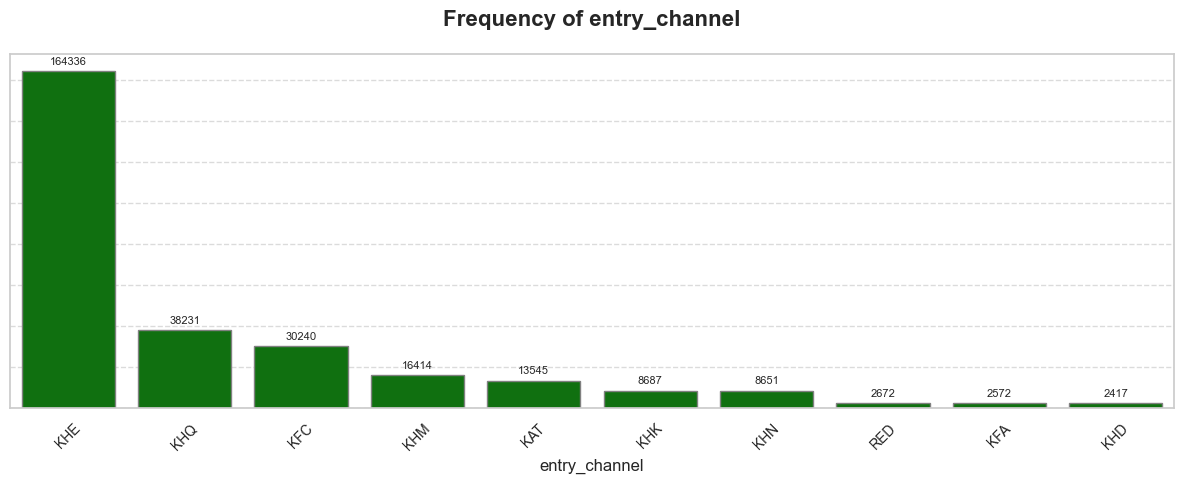

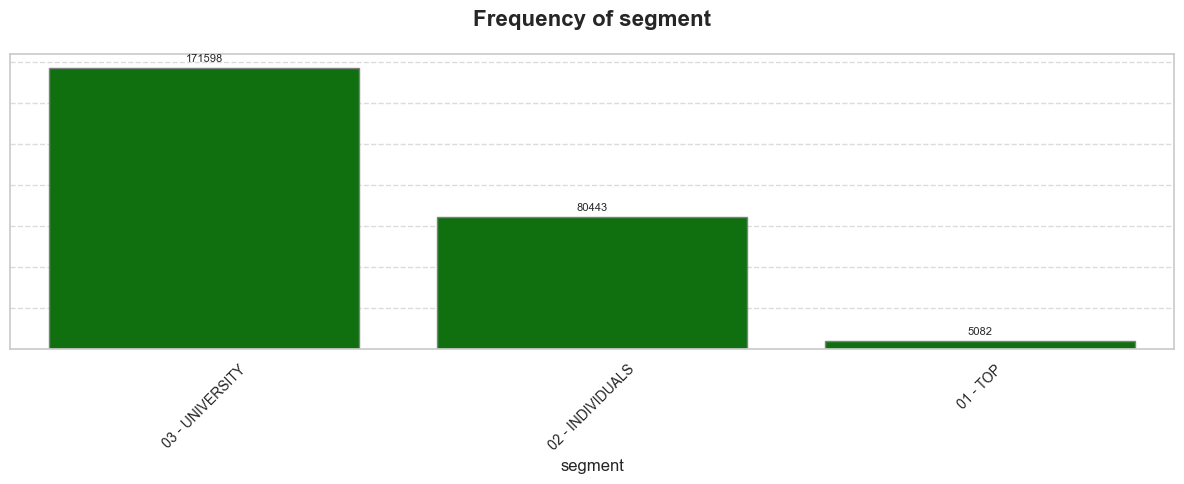

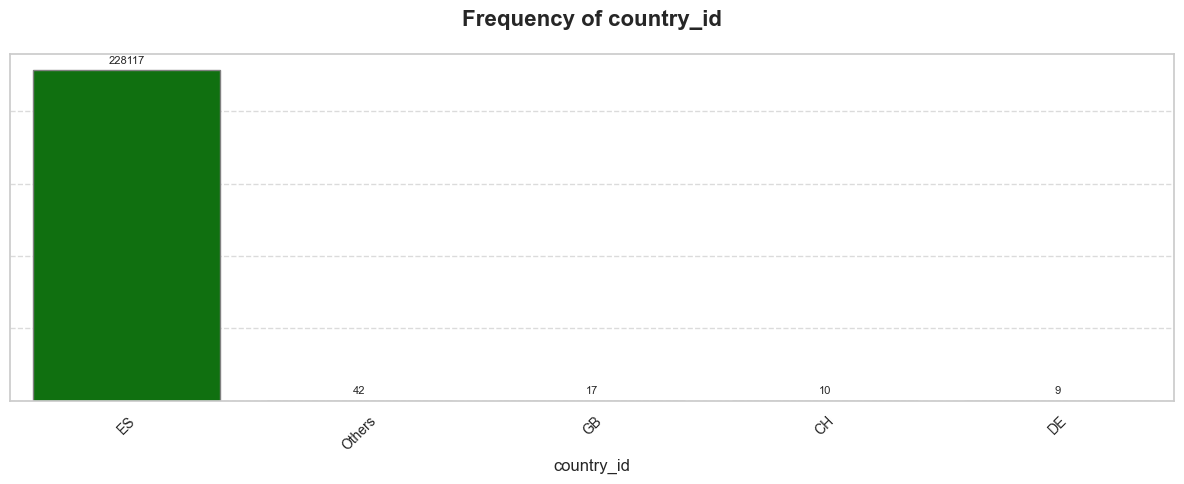

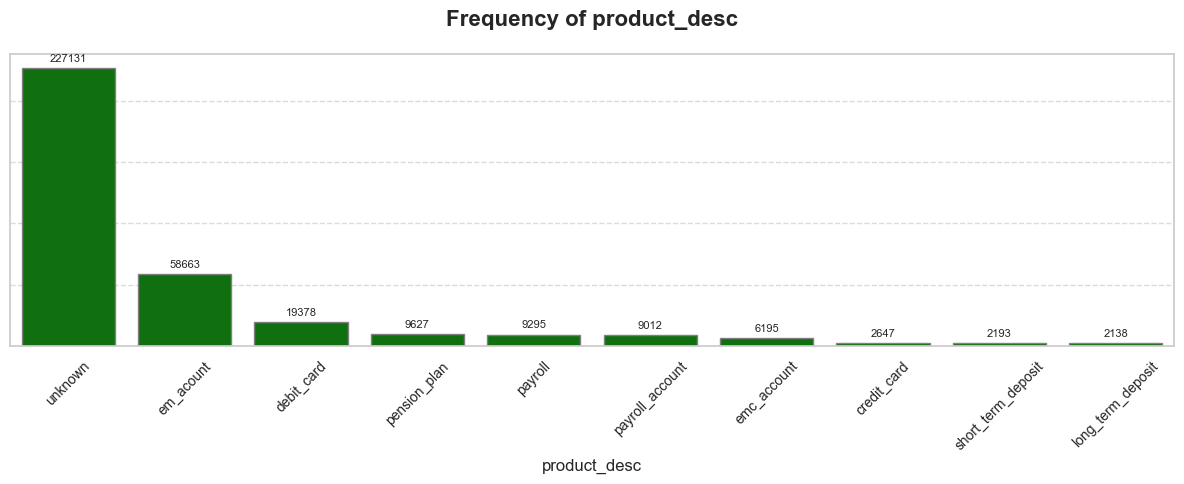

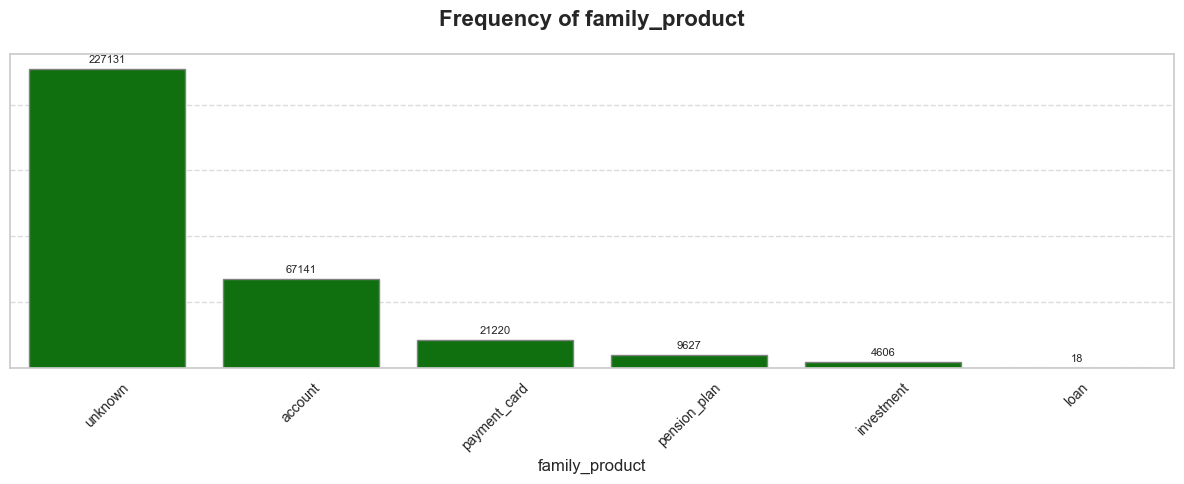

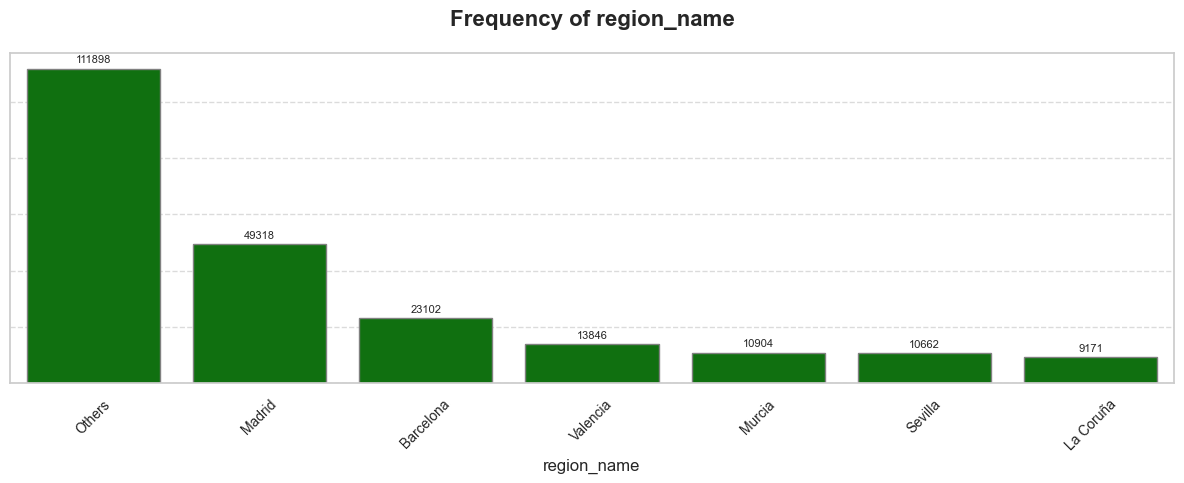

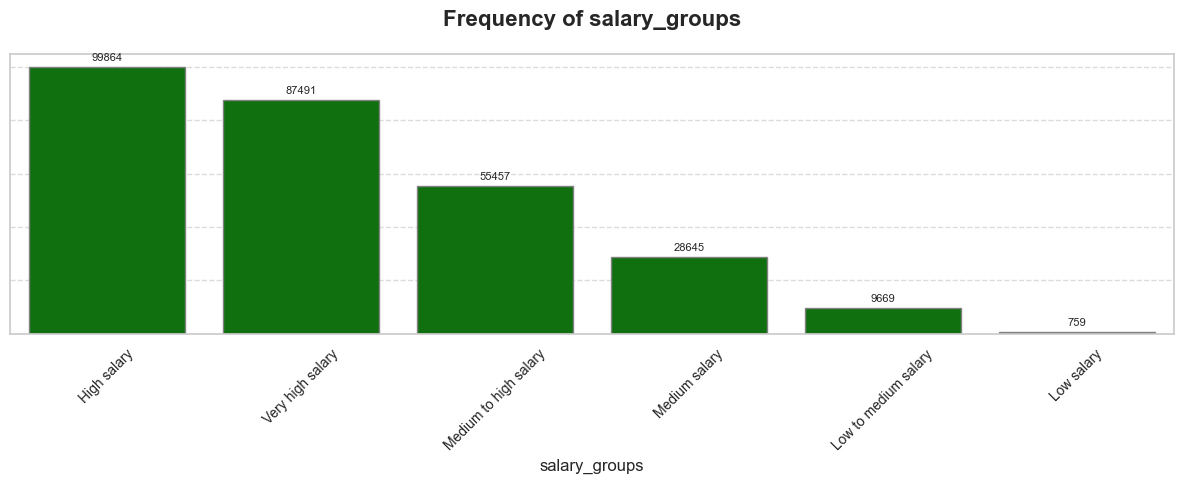

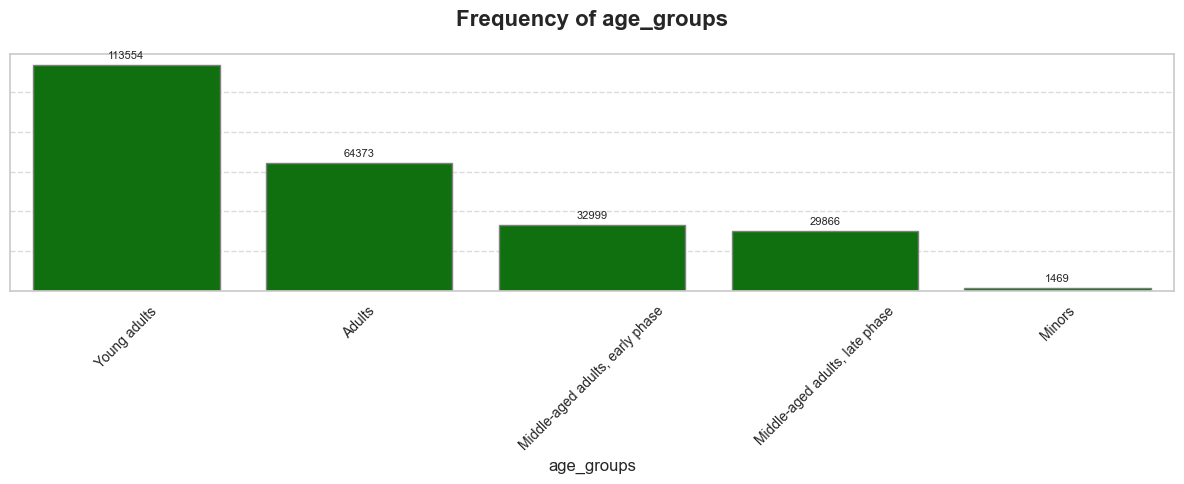

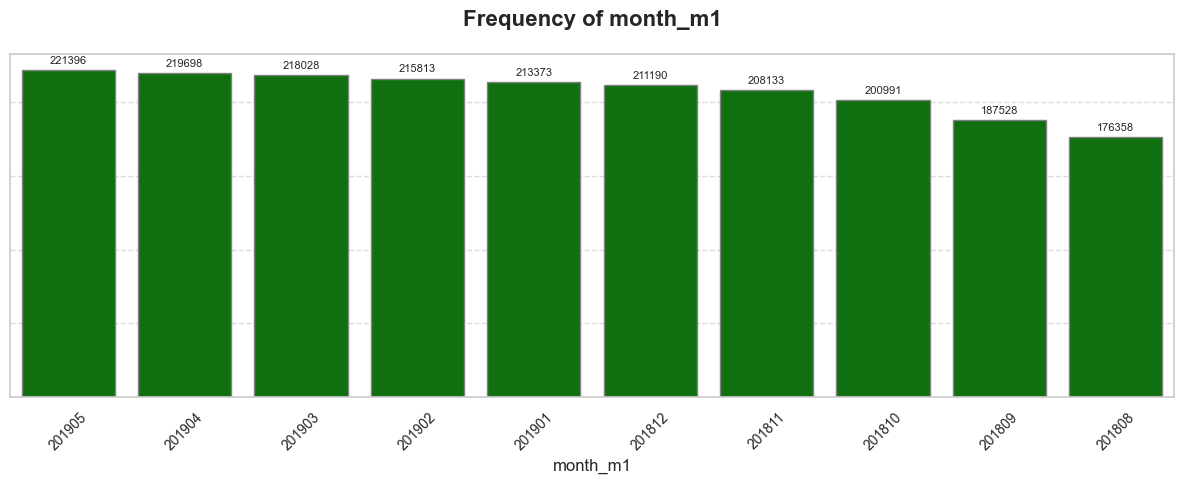

In [72]:
# Identifying categorical variables:
excluded_columns = ["customer_id", "month_partition", "sale_id", "product_id", "region_code"]
categorical_columns = df2.select_dtypes(include=["object"]).columns
categorical_columns = [col for col in categorical_columns if col not in excluded_columns]

# Setting the style:
sns.set(style="whitegrid")

for col in categorical_columns:
    plt.figure(figsize=(12, 5))

    # Getting the unique customer counts for each category in the categorical column:
    customer_counts = df2.groupby(col)["customer_id"].nunique()

    # Sorting customer counts:
    customer_counts = customer_counts.sort_values(ascending=False) #!!

    # Checking if there are more than 10 categories:
    if len(customer_counts) > 10:
        # Selecting the top 10 categories when needed:
        top_categories = customer_counts.nlargest(10)
    else:
        # Using all categories:
        top_categories = customer_counts

    # Creating the bar plot with a grey edge and the brand color:
    ax = sns.barplot(x=top_categories.index, y=top_categories.values, color="green", edgecolor="grey")

    # Setting title and labels fontsize:
    ax.set_title(f"Frequency of {col}", fontsize=16, fontweight="bold", pad=20)

    # Setting ticks and labels to avoid the warning:
    ax.set_xticks(range(len(top_categories)))                           # Set x-ticks
    ax.set_xticklabels(top_categories.index, rotation=45, fontsize=10)  # Set x-tick labels

    # Removing the y-axis labels:
    ax.set_yticklabels([])
    ax.set_ylabel("")

    # Adding count labels on top of the bars with a smaller font size:
    for p in ax.patches:
        height = int(p.get_height())
        if height > 0:
            ax.annotate(f"{height}",
                        (p.get_x() + p.get_width() / 2., height),
                        ha="center", va="bottom", xytext=(0, 3),
                        textcoords="offset points", fontsize=8)

    # Adding grid lines for easier reading:
    ax.yaxis.grid(True, linestyle="--", alpha=0.7)

    # Adjusting layout to prevent overlap:
    plt.tight_layout()
    plt.show()

### 4.2. Bivariate Analysis

In the complete project we examine multiple options as we can see in the readme file. Below we can find two examples.

#### - Product Implementation in Market

Next, we will analyze the percentage of customers who have subscribed to the most popular products over time.

The top products are: ['em_account', 'debit_card', 'payroll_account', 'pension_plan', 'emc_account']


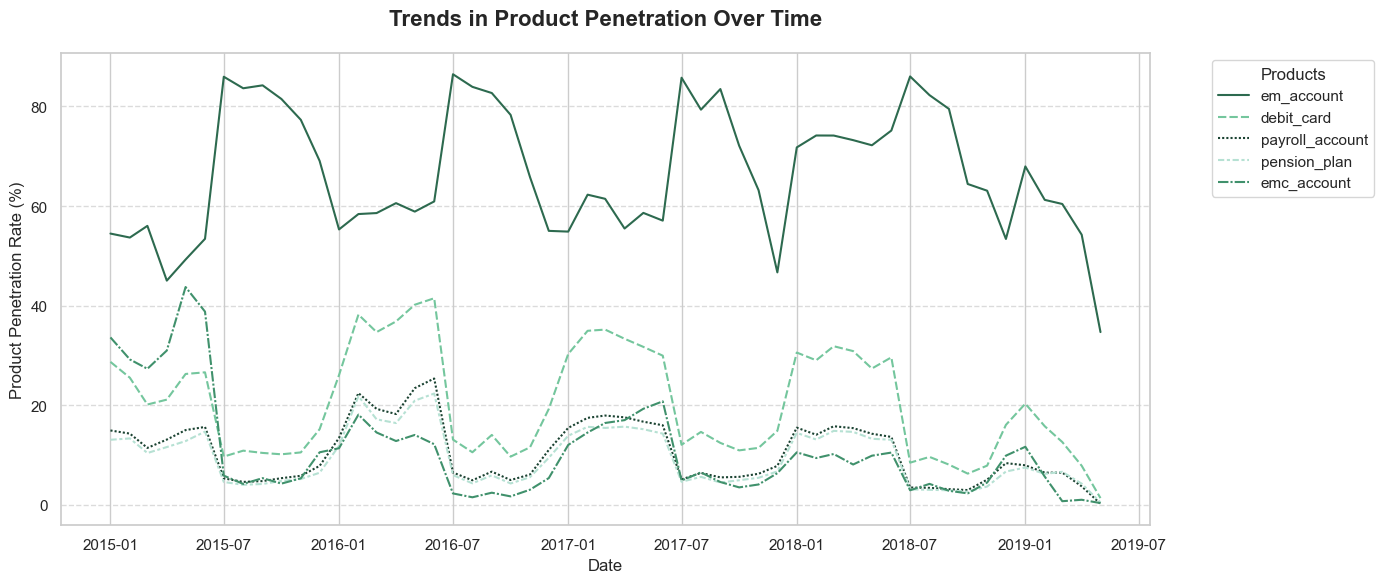

In [86]:
# Grouping by "customer_id" to take into account one unique value by customer and
# calculating if they purchased a product:
grouped_df = df2.groupby(["customer_id", "entry_date"])[products_list].max().reset_index()

# Calculatin product implementation of all products (percentage of customers that purchased a product):
penetration = grouped_df[products_list].mean() * 100

# Obtaining top 5 products with higher implementation:
top_products = penetration.nlargest(5).index.tolist()
print(f"The top products are: {top_products}")

# Grouping products by date and calculating the implementation of eaach product by date:
penetration_products = grouped_df.groupby("entry_date")[top_products].mean() * 100

# Setting palette:
palette_5 = ["#2D6A4F", "#74C69D", "#1B4332", "#B6E1D3", "#40916C"] #95D5B2

# Plotting:
plt.figure(figsize=(14, 6))
sns.lineplot(data=penetration_products, palette=palette_5)

plt.title("Trends in Product Penetration Over Time", fontsize=16, fontweight="bold", pad=20)
plt.xlabel("Date")
plt.ylabel("Product Penetration Rate (%)")
plt.legend(title="Products", bbox_to_anchor=(1.05, 1), loc="upper left")

# Adding grid lines for easier reading:
ax = plt.gca()  # get current axis
ax.yaxis.grid(True, linestyle="--", alpha=0.7)

# Adjusting layout to prevent overlap:
plt.tight_layout()
plt.show()

In [ ]:
# Calculating the products implementation in 2019 (percentage of customers that purchased each product):
products_penetration_2019 = round((grouped_df_2019.groupby("entry_date")[products_list].mean() * 100).mean(), 2)

# Ordering products by implementation, from highest to lowest:
products_penetration_2019.sort_values(ascending=False)

em_account            55.71
debit_card            11.59
pension_plan           5.03
payroll_account        4.97
payroll                4.77
emc_account            3.90
credit_card            0.55
long_term_deposit      0.32
securities             0.27
funds                  0.11
mortgage               0.01
short_term_deposit     0.00
loans                  0.00
em_account_p           0.00
dtype: float64

#### - Total Revenue by Product

We focus on best selling products for display.

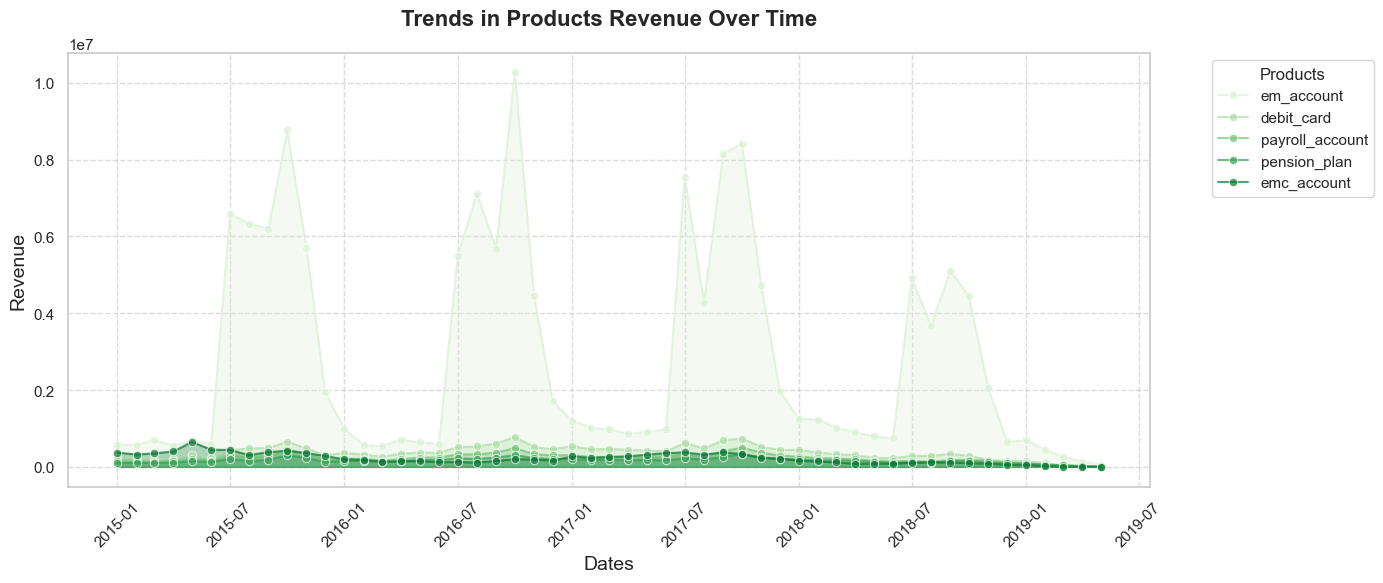

In [105]:
# Checking if products_revenue is None or empty:
if products_revenue is None or products_revenue.empty:
    raise ValueError("The products_revenue DataFrame is not properly initialized or is empty.")

# Setting palette using Seaborn:
color_palette = sns.color_palette("Greens", len(products_revenue.columns))

# Creating the plot using Seaborn's lineplot:
plt.figure(figsize=(14, 6))
sns.set(style="whitegrid")

# Plotting revenue by product:
for i, product in enumerate(products_revenue.columns):
    sns.lineplot(data=products_revenue, x=products_revenue.index, y=product,
                 label=product, color=color_palette[i], marker="o", alpha=0.7)
    plt.fill_between(products_revenue.index, 0, products_revenue[product], 
                     color=color_palette[i], alpha=0.3)

# Adding title and labels:
plt.title("Trends in Products Revenue Over Time", fontsize=16, fontweight="bold", pad=20)
plt.xlabel("Dates", fontsize=14)
plt.ylabel("Revenue", fontsize=14)
plt.legend(title="Products", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)
plt.xticks(rotation=45)

# Adding grid lines for easier reading:
plt.grid(True, linestyle="--", alpha=0.7)

# Adjusting layout to prevent overlap:
plt.tight_layout()
plt.show()

### 4.3. Multivariate Analysis

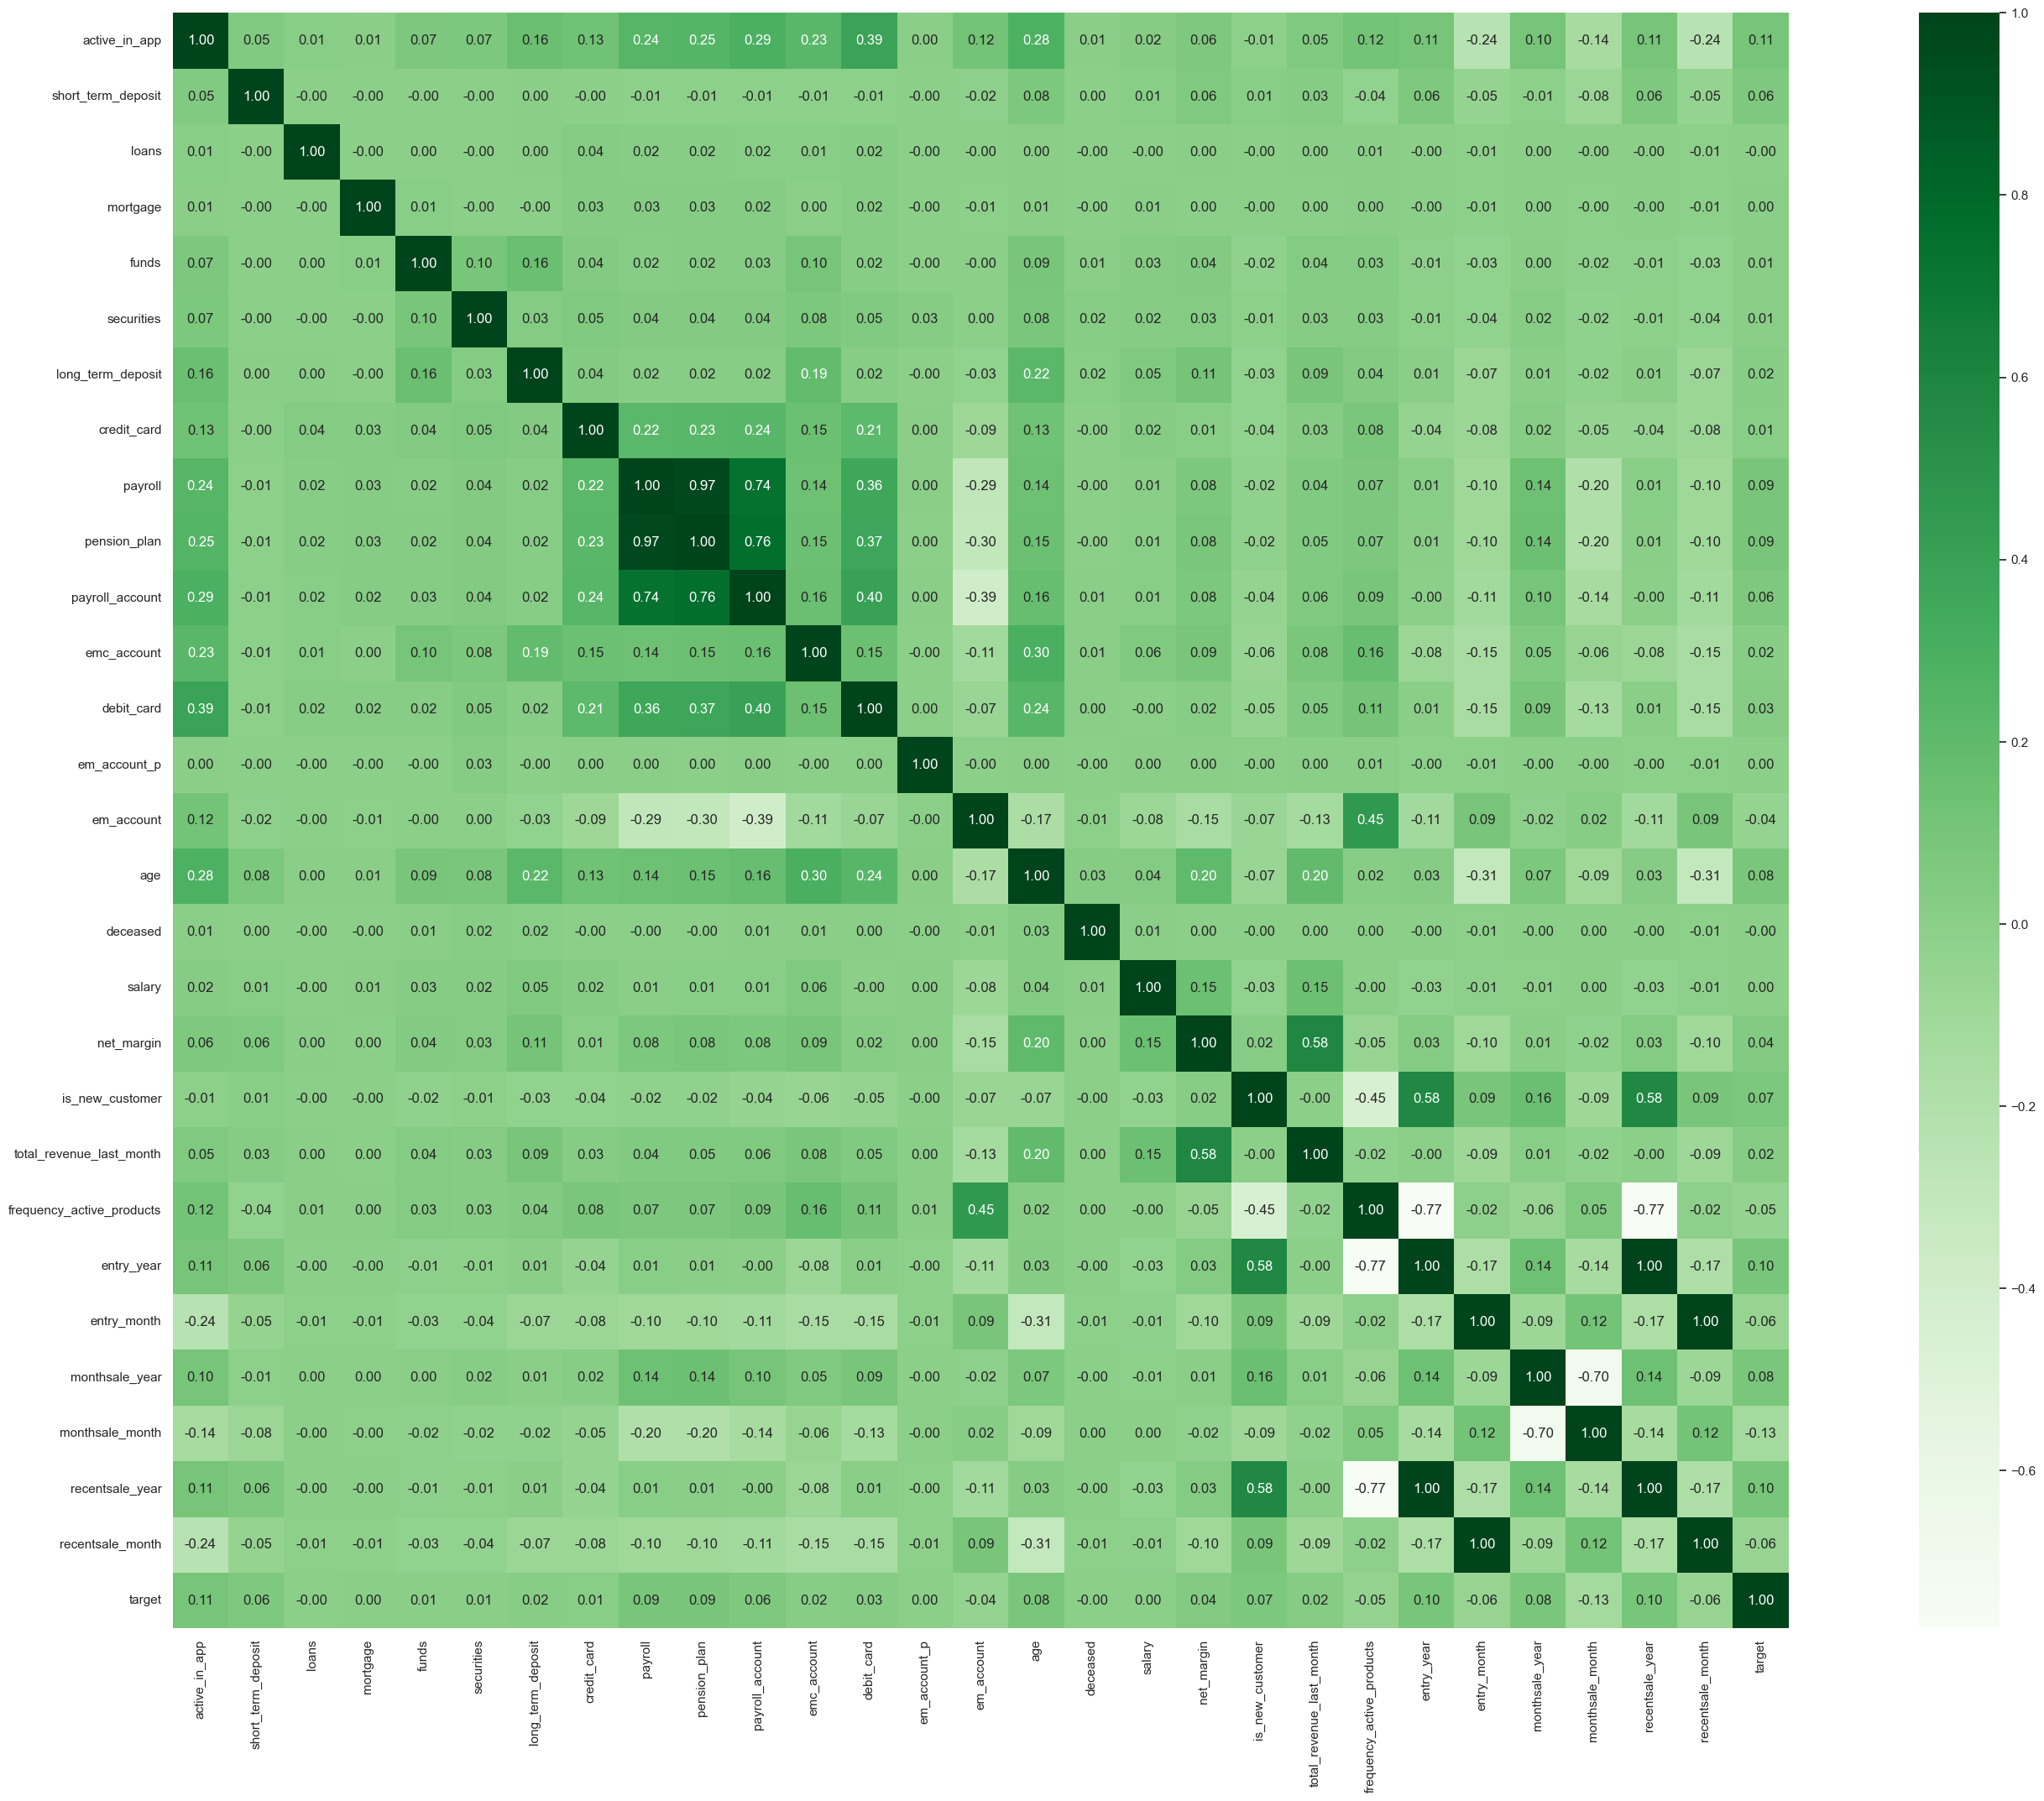

In [120]:
corr_matrix = df2[['active_in_app', 'short_term_deposit', 'loans', 'mortgage', 'funds', 'securities',
                   'long_term_deposit', 'credit_card', 'payroll', 'pension_plan', 'payroll_account', 'emc_account',
                   'debit_card', 'em_account_p', 'em_account', 'age', 'deceased', 'salary', 'net_margin',
                   'is_new_customer', 'total_revenue_last_month', 'frequency_active_products', 'entry_year',
                   'entry_month', 'monthsale_year', 'monthsale_month', 'recentsale_year', 'recentsale_month',
                   'target']].corr()

# Plotting:
plt.figure(figsize=(40, 25)) 
sns.heatmap(corr_matrix, cmap="Greens", fmt=".2f", square=True, linecolor="white", annot=True)
plt.show()

In [107]:
identifying_correlated_pairs(df2, threshold=0.8)

[{'Column 1': 'payroll',
  'Column 2': 'pension_plan',
  'Correlation percentage': 0.97},
 {'Column 1': 'entry_year',
  'Column 2': 'recentsale_year',
  'Correlation percentage': 1.0},
 {'Column 1': 'entry_month',
  'Column 2': 'recentsale_month',
  'Correlation percentage': 1.0}]